In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendra416/ddos-datasets")

print("Path to dataset files:", path)

/home/vanya/bigdata/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.68G/2.68G [06:21<00:00, 7.55MB/s]

Extracting files...


Path to dataset files: /home/vanya/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1


In [1]:

import dask.dataframe as dd

path = "/home/vanya/bigdata_dataset/ddos_balanced/final_dataset.csv"
dd.read_csv(path).to_parquet("data.parquet")

    


KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
import os
df = pd.read_parquet("data.parquet").sample(frac=0.05)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639731 entries, 109572 to 115299
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         639731 non-null  int64  
 1   Flow ID            639731 non-null  string 
 2   Src IP             639731 non-null  string 
 3   Src Port           639731 non-null  int64  
 4   Dst IP             639731 non-null  string 
 5   Dst Port           639731 non-null  int64  
 6   Protocol           639731 non-null  int64  
 7   Timestamp          639731 non-null  string 
 8   Flow Duration      639731 non-null  int64  
 9   Tot Fwd Pkts       639731 non-null  int64  
 10  Tot Bwd Pkts       639731 non-null  int64  
 11  TotLen Fwd Pkts    639731 non-null  float64
 12  TotLen Bwd Pkts    639731 non-null  float64
 13  Fwd Pkt Len Max    639731 non-null  float64
 14  Fwd Pkt Len Min    639731 non-null  float64
 15  Fwd Pkt Len Mean   639731 non-null  float64
 16  Fw

In [3]:
df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

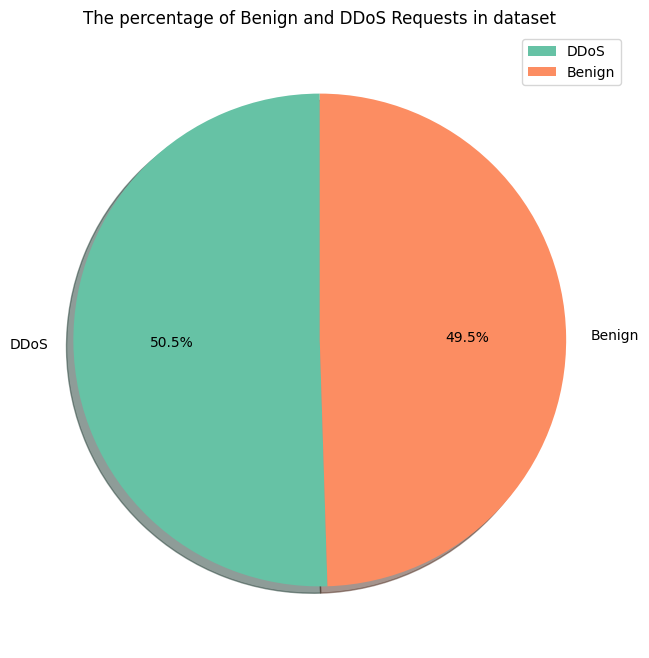

In [8]:
# Label = ['DDoS','Benign']
# num_of_ddos_classes = df['Label'].value_counts()['ddos']
# num_of_benign_classes = df['Label'].value_counts()['Benign']
# plt.figure(figsize = (13,8))
# colors = sns.color_palette("Set2")
# plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
# plt.legend(['DDoS', 'Benign'])
# plt.title('The percentage of Benign and DDoS Requests in dataset')
# plt.show()

# Переведем object в тип string и закодируем ip

In [5]:
import ipaddress                                                                   # converting the IP address form Strings to int

df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

df['Src IP'] = df['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst IP'] = df['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [9]:
df


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
78544,2860982,172.31.69.25-18.219.193.20-80-35120-6,2887730457,80,316391700,35120,6,16/02/2018 11:22:43 PM,4171116,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
107810,3456121,172.31.66.119-94.131.223.46-3389-63390-6,1585700654,63390,2887729783,3389,6,20/02/2018 09:13:37,2879928,10,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
93165,2645657,172.31.0.2-172.31.64.87-53-51832-17,2887729239,51832,2887712770,53,17,20/02/2018 02:36:39,34087,2,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
24230,3188177,172.31.0.2-172.31.65.82-53-63825-17,2887729490,63825,2887712770,53,17,20/02/2018 09:33:13,17528,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1698,350145,172.31.69.25-18.219.193.20-80-36216-6,316391700,36216,2887730457,80,6,16/02/2018 11:17:08 PM,2596,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60542,7875954,172.31.67.8-186.113.19.123-445-56577-6,2887729928,445,3127972731,56577,6,20/02/2018 03:55:49,21,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
30361,7273244,172.31.64.61-185.70.187.189-3389-51045-6,2887729213,3389,3108420541,51045,6,20/02/2018 12:38:26,88453813,2,...,20,0.0,0.0,0.0,0.0,88453813.0,0.0,88453813.0,88453813.0,Benign
103040,903539,172.31.69.25-18.219.193.20-80-56348-6,316391700,56348,2887730457,80,6,16/02/2018 11:21:12 PM,22664,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


# Проверим наличие пропусков в датасете

In [10]:
# g = df.isna().sum()
# for col_name in g.index:
#     if g[col_name] != 0:
#         print("Найдено пропусков ", col_name, g[col_name])

Найдено пропусков  Flow Byts/s 3056


# Найдем столбцы столбцы с большим кол-во повторяющихся значений

In [11]:

# rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
# frequency = [rowbuilder(col) for col in df.columns]
# skewed = pd.DataFrame(frequency)

# skewed = skewed[skewed['frequency'] >= 0.95]
# colsToDrop = skewed['col'].values
# colsToDrop

array(['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Cnt', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Active Std'], dtype=object)

# Так как мы знаем о пропусках, заполним их средними значениями

In [12]:

# del rowbuilder
# del frequency

# df.dropna(inplace=True)

# Удалим столбцы с большим кол-во повторяющихся значений

In [13]:

# df.drop(columns=colsToDrop, inplace=True)

# print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 72 columns and 1276407 rows


# Удалим строки с некорректными значениями


In [14]:
# import numpy as np
# import pandas as pd

# numeric_columns = df.select_dtypes(include=[np.number]).columns
# inf_subset = df[numeric_columns].columns[np.isinf(df[numeric_columns]).any(axis=0)].tolist()
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.dropna(subset=inf_subset, how="all", inplace=True)
# # assert not np.isinf(df[numeric_columns]).any().any()
# colsToDrop = set(colsToDrop)

In [10]:
df.shape

(639731, 85)

# Удалим возможные отрицательные значения (признаки приведенные ниже не могу быть отрицательными)


In [16]:
# negValCols = ['Src IP', 'Dst IP', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Init Bwd Win Byts', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
# print(colsToDrop)
# negValCols = set(negValCols) - colsToDrop
# print(negValCols)
# for col in negValCols:
#     if df[col].dtype in ['float64', 'int64']:
#         df = df[df[col] >= 0]

{'Bwd Byts/b Avg', 'Active Std', 'Bwd URG Flags', 'FIN Flag Cnt', 'Fwd PSH Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'URG Flag Cnt', 'Bwd Pkts/b Avg', 'Bwd PSH Flags', 'Fwd URG Flags', 'Fwd Blk Rate Avg'}
{'Dst IP', 'Bwd IAT Tot', 'Flow IAT Mean', 'Src IP', 'Flow IAT Max', 'Bwd IAT Max', 'Bwd IAT Min', 'Flow Pkts/s', 'Flow IAT Min', 'Bwd IAT Mean', 'Init Bwd Win Byts'}


In [11]:
df.shape

(639731, 85)

# Опираясь на предметную область, выберем наиболее важные признаки

In [6]:
colsToUse = [
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "Fwd Pkt Len Max",
    "TotLen Fwd Pkts",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std",
    "Flow Duration",
    "Fwd IAT Mean",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "Flow Pkts/s",
    "Flow Byts/s",
    "Label"
]


In [7]:
df = df[colsToUse]
df

,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,TotLen Fwd Pkts,Init Bwd Win Byts,Bwd Pkt Len Std,Flow Duration,Fwd IAT Mean,Flow IAT Min,Bwd IAT Tot,SYN Flag Cnt,RST Flag Cnt,Flow Pkts/s,Flow Byts/s,Label
__null_dask_index__,,,,,,,,,,,,,,,
30494,3,4,161.0,161.0,149,244.000000,192228,95787.500000,24.0,191918.0,0,1,36.415090,3376.199097,Benign
98550,1,1,46.0,46.0,-1,0.000000,388,0.000000,388.0,0.0,0,0,5154.639175,278350.515464,Benign
144069,0,2,0.0,0.0,0,0.000000,3,0.000000,3.0,3.0,1,0,666666.666667,0.000000,ddos
37786,0,2,0.0,0.0,0,0.000000,3,0.000000,3.0,3.0,1,0,666666.666667,0.000000,ddos
102981,2,1,0.0,0.0,225,0.000000,54411,13676.000000,13676.0,0.0,0,0,55.135910,0.000000,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113477,1,1,0.0,0.0,256,0.000000,21,0.000000,21.0,0.0,0,0,95238.095238,0.000000,Benign
76426,3,4,436.0,436.0,31,430.000000,46984,11719.000000,43.0,23844.0,0,0,148.986889,27583.858335,Benign
100489,1,1,0.0,0.0,225,0.000000,6567,0.000000,6567.0,0.0,0,0,304.553068,0.000000,ddos


# Гистограммы для признаков

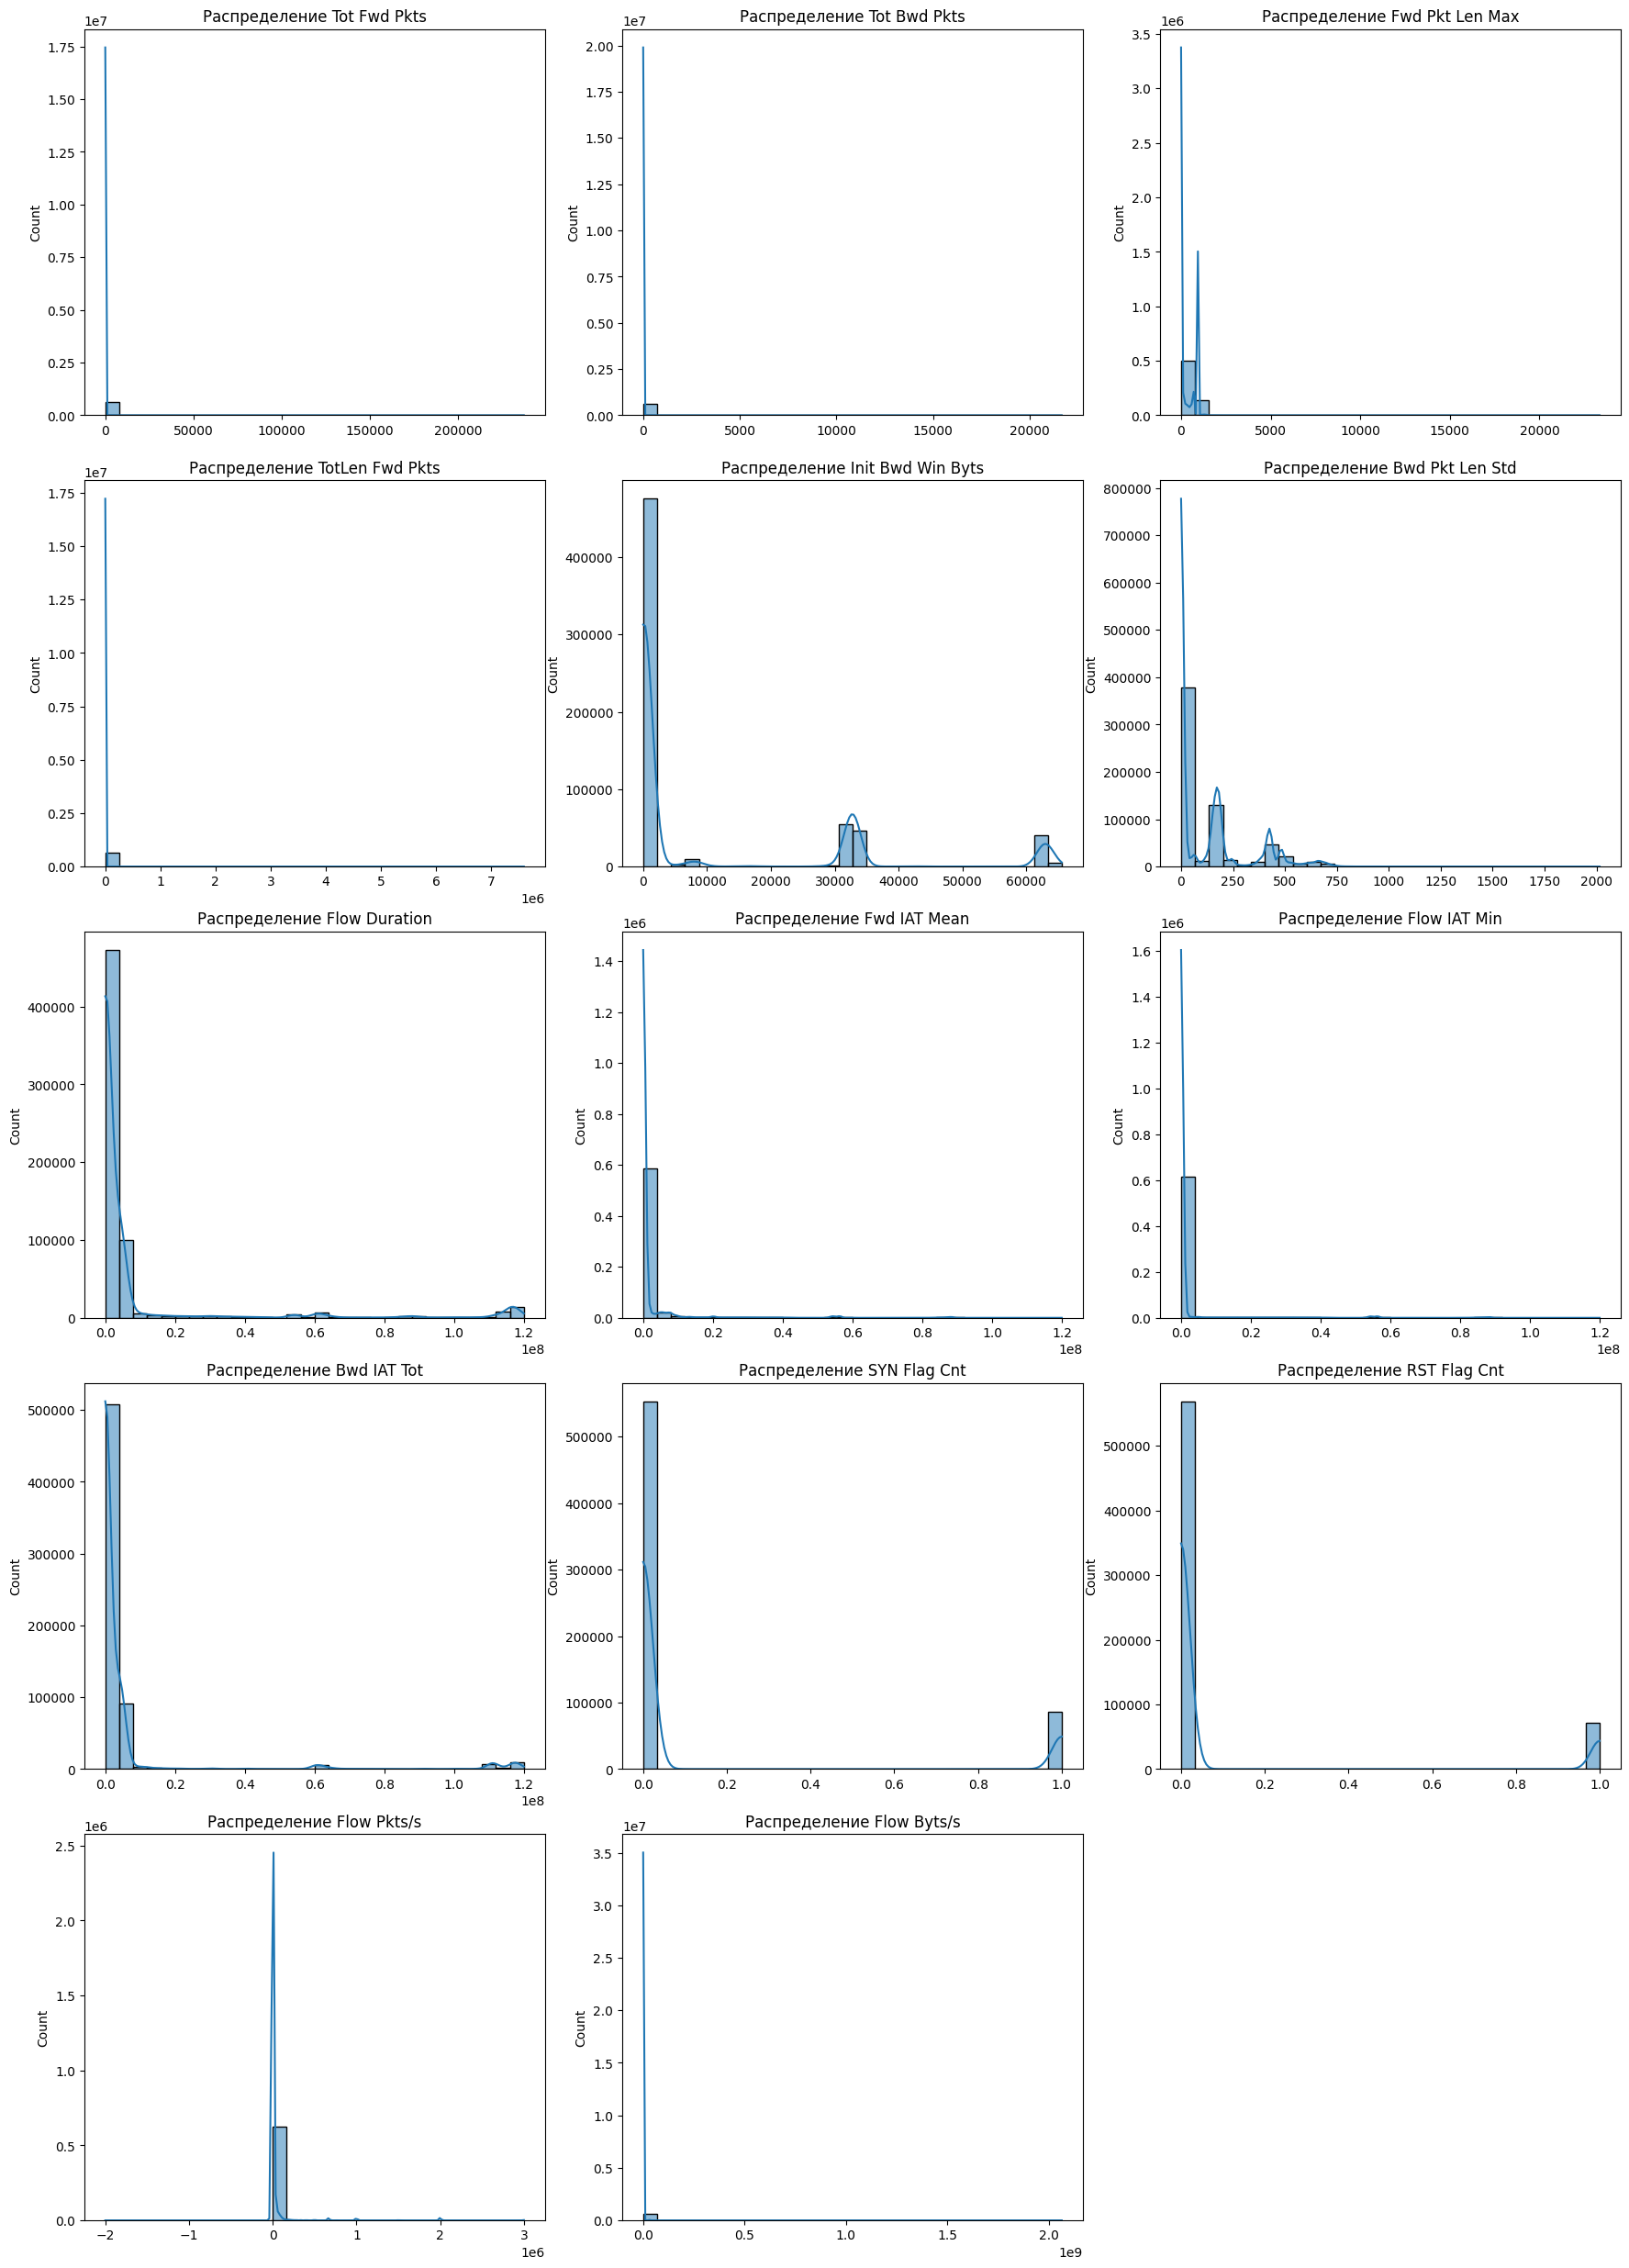

In [16]:

# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# n_cols = 3 
# n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))
# fig.tight_layout(pad=3.0) 

# for i, col in enumerate(numeric_cols):
#     row = i // n_cols
#     col_num = i % n_cols
#     if n_rows > 1:
#         ax = axes[row, col_num]
#     else:
#         ax = axes[col_num]  
        
#     sns.histplot(df[col], bins=30, kde=True, ax=ax)
#     ax.set_title(f'Распределение {col}')
#     ax.set_xlabel('')
    
# for j in range(i+1, n_rows*n_cols):
#     row = j // n_cols
#     col_num = j % n_cols
#     if n_rows > 1:
#         axes[row, col_num].axis('off')
#     else:
#         axes[col_num].axis('off')

# plt.show()

# Расчитаем выбросы

In [8]:
%%time
import numpy as np

def outliers(df, feature):
    if df[feature].dtype in ["float64", "int64"] and feature not in set(["Label", "Src Port", "Src IP", "Dst IP"]):
        main_data = df[df[feature] > 0][feature]
        soft_upper = main_data.quantile(0.95)  
        extreme_mask = (df[feature] > soft_upper)
        df[feature] = np.where(extreme_mask, soft_upper, df[feature])  # Winsorization

CPU times: user 4 μs, sys: 10 μs, total: 14 μs
Wall time: 20 μs


# Выберем подвыборку для GNB и для random forest

In [9]:
%%time

df = df.dropna()
df_forest = df.copy()
df_gaus = df.copy()
# df_gaus.drop(columns=['Label', 'Src Port', 'Src IP', 'Dst IP'])

for feature in df_gaus.columns:
    outliers(df_gaus, feature)
    print(len(df_gaus))


638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
638294
CPU times: user 2.22 s, sys: 173 ms, total: 2.4 s
Wall time: 2.39 s


In [26]:
df_gaus.shape

(638273, 15)

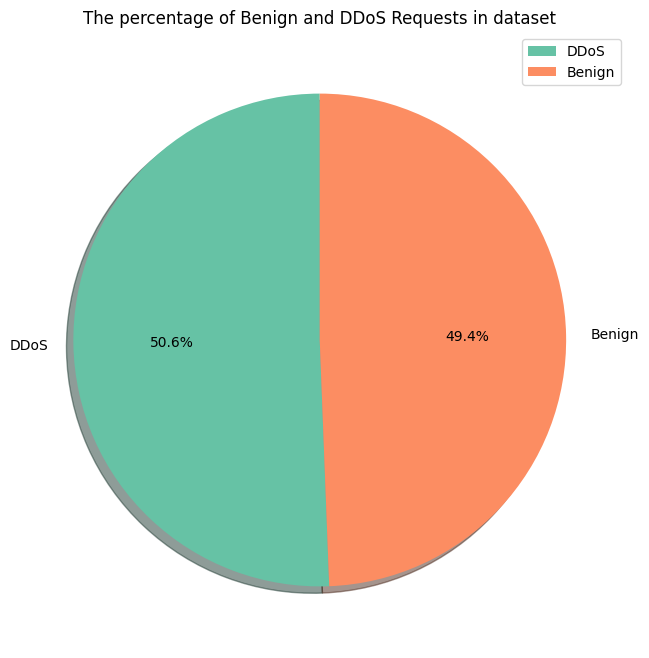

In [27]:
# Label = ['DDoS','Benign']
# num_of_ddos_classes = df['Label'].value_counts()['ddos']
# num_of_benign_classes = df['Label'].value_counts()['Benign']
# plt.figure(figsize = (13,8))
# colors = sns.color_palette("Set2")
# plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
# plt.legend(['DDoS', 'Benign'])
# plt.title('The percentage of Benign and DDoS Requests in dataset')
# plt.show()

# Возпользуемся GNB классификатором


Метрики классификации:
Точность на обучении:     0.6878
Точность на тесте:        0.6883
Precision (Точность):     0.6377
Recall (Полнота):         0.8940
AUC-ROC:                  0.8181


<Figure size 800x600 with 0 Axes>

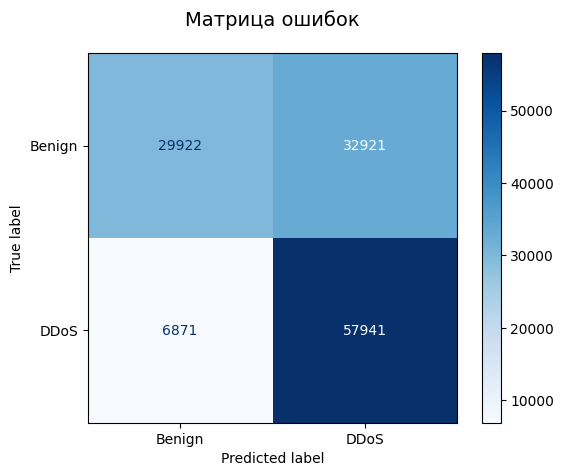

CPU times: user 1.09 s, sys: 66.8 ms, total: 1.15 s
Wall time: 1.15 s


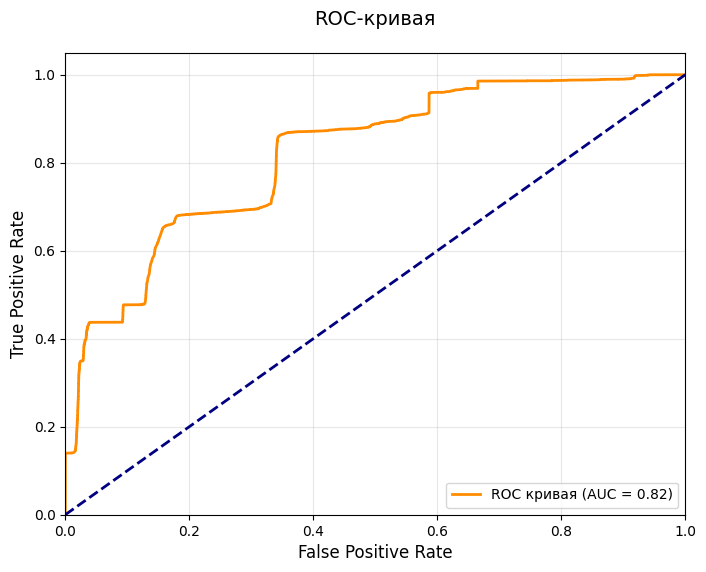

In [34]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            confusion_matrix, roc_curve, roc_auc_score, 
                            ConfusionMatrixDisplay)
import seaborn as sns
Y = df_gaus['Label']
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)
X = df_gaus.drop(columns=['Label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = GaussianNB(priors=[0.5, 0.5])
classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)
y_proba_test = classifier.predict_proba(X_test_scaled)[:, 1] 

print('\n\033[1mМетрики классификации:\033[0m')
print(f"{'Точность на обучении:':<25} {accuracy_score(y_train, y_pred_train):.4f}")
print(f"{'Точность на тесте:':<25} {accuracy_score(y_test, y_pred_test):.4f}")
print(f"{'Precision (Точность):':<25} {precision_score(y_test, y_pred_test):.4f}")
print(f"{'Recall (Полнота):':<25} {recall_score(y_test, y_pred_test):.4f}")
print(f"{'AUC-ROC:':<25} {roc_auc_score(y_test, y_proba_test):.4f}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок', fontsize=14, pad=20)
plt.grid(False)
plt.show()

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC кривая (AUC = {roc_auc_score(y_test, y_proba_test):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривая', fontsize=14, pad=20)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)


# Используем случайный лес

# Random forest

<Axes: >

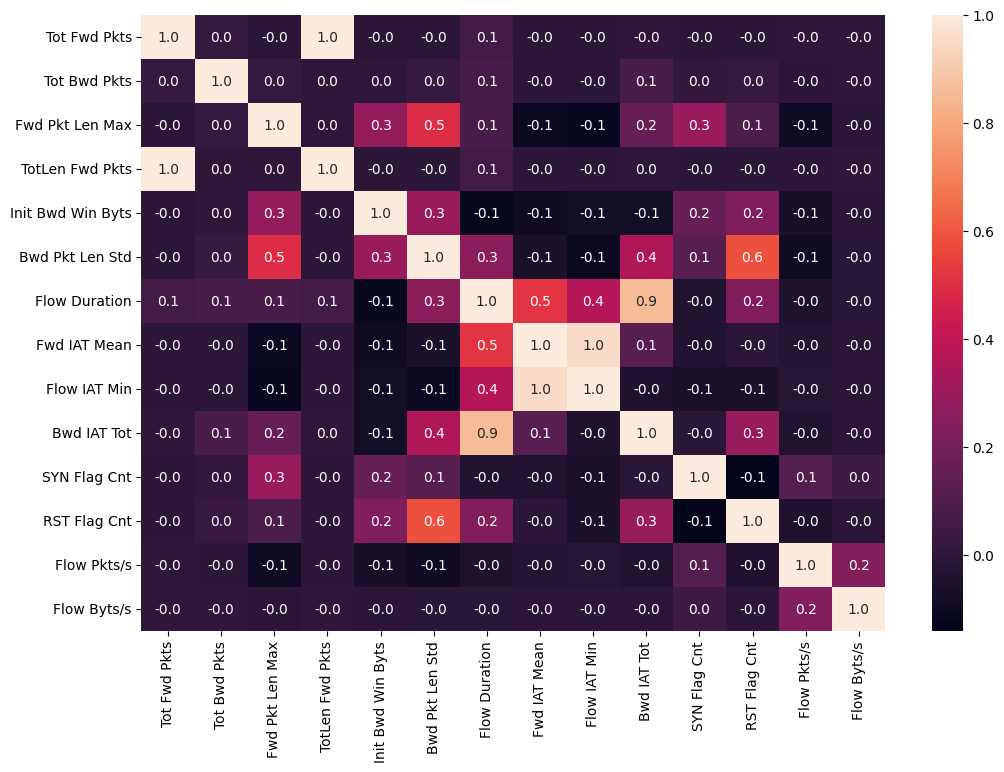

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


Y = df_forest['Label']  
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)  
X = df_forest.drop(columns=['Label']) 
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".1f")

In [30]:
print(X.columns.tolist())

correlations = X.corrwith(Y)
print(correlations.sort_values(ascending=False).head(10))

['Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'TotLen Fwd Pkts', 'Init Bwd Win Byts', 'Bwd Pkt Len Std', 'Flow Duration', 'Fwd IAT Mean', 'Flow IAT Min', 'Bwd IAT Tot', 'SYN Flag Cnt', 'RST Flag Cnt', 'Flow Pkts/s', 'Flow Byts/s']
Fwd Pkt Len Max      0.270733
SYN Flag Cnt         0.175700
TotLen Fwd Pkts      0.013241
Tot Fwd Pkts         0.011991
Init Bwd Win Byts    0.010736
Tot Bwd Pkts        -0.020909
Flow IAT Min        -0.047389
Bwd Pkt Len Std     -0.074335
Fwd IAT Mean        -0.096118
Bwd IAT Tot         -0.183848
dtype: float64


/home/vanya/bigdata/venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44  
)

forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=2,
    random_state=33,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    class_weight='balanced',
    verbose=1
)
forest.fit(X_train, y_train)

y_pred_test = forest.predict(X_test)
y_proba_test = forest.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_test, target_names=['Benign', 'DDoS']))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок', fontsize=14, pad=20)
plt.grid(False)
plt.show()

# ROC-кривая
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC кривая (AUC = {roc_auc_score(y_test, y_proba_test):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривая', fontsize=14, pad=20)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

def get_node_stats(tree, feature_names):
    n_nodes = tree.tree_.node_count
    left_child = tree.tree_.children_left
    right_child = tree.tree_.children_right
    feature = tree.tree_.feature
    impurity = tree.tree_.impurity
    
    node_stats = []
    for i in range(n_nodes):
        if left_child[i] != right_child[i]:  # Если не лист
            node_stats.append({
                'node_id': i,
                'feature': feature_names[feature[i]],
                'entropy': impurity[i],
                'threshold': tree.tree_.threshold[i]
            })
    return pd.DataFrame(node_stats)

tree = forest.estimators_[0]
entropy_stats = get_node_stats(tree, X.columns)

top_entropy_features = entropy_stats.groupby('feature')['entropy'].mean().sort_values(ascending=False).head(5)
print("\nТоп-5 признаков по средней энтропии:")
print(top_entropy_features)


plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X.columns,
          class_names=['Benign', 'DDoS'], 
          filled=True,
          impurity=True,
          max_depth=3)
plt.title("Дерево решений с отображением энтропии (Gini impurity)", pad=20)
plt.show()

# Важность признаков
importances = forest.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], 
        feature_importance['Importance'][:20])
plt.title('Топ важных признаков', fontsize=14, pad=20)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float32').